### Analyzing the World Bank's Twitter Feed, Judy Yang, DAT10 Project
### Part 3. Data Exploration

In [42]:
pwd

u'/Users/judyyang/Documents/GA_DS_course/Final_Project/notebooks'

In [43]:
from datetime import datetime
import time
import json
import operator 
import preprocess
from collections import Counter
#from textblob import TextBlob

import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#% sign 

import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

from ttp import ttp

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

In [44]:
# Create excel to save outputs from this notebook
writer = ExcelWriter('./data/Project03_outputs.xlsx')

In [45]:
wb = pd.read_pickle('./data/WorldBank_all_processed_17feb_2016')
wb.shape

(93733, 21)

In [46]:
wb.user_screen_name.value_counts()

WBG_Agriculture    3200
worldbankdata      3200
WorldBankPSD       3200
WorldBankSAsia     3200
WBG_Cities         3200
WBG_Finance        3200
wbg_gov            3200
WBG_Environment    3200
WBG_Gender         3200
WorldBank_IEG      3200
WBG_Education      3200
WorldBankWater     3200
WBPubs             3200
WBG_Poverty        3200
WBG_Climate        3200
WBG_LeadINLearn    3200
IFC_org            3200
WorldBankAfrica    3200
WorldBankSEI       3200
WBG_Health         3200
wb_research        3199
WorldBank          3196
WBG_PPP            2961
WorldBankVideos    2725
MIGAWorldBank      2000
WorldBankIndia     1907
WBG_SPLabor        1810
WorldBankKenya     1707
WBG_Energy         1695
WBCaribbean        1597
WBG_Transport      1508
WorldBankPhotos    1259
WBOpenFinances     1123
WorldBankECA        808
impacteval          745
WBG_Dev4Peace       649
WBedutech           508
JimKim_WBG          336
Name: user_screen_name, dtype: int64

In [47]:
wb.groupby('user_screen_name').is_RT.mean()

user_screen_name
IFC_org            0.195312
JimKim_WBG         0.059524
MIGAWorldBank      0.477500
WBCaribbean        0.233563
WBG_Agriculture    0.062187
WBG_Cities         0.143437
WBG_Climate        0.133750
WBG_Dev4Peace      0.302003
WBG_Education      0.333125
WBG_Energy         0.323894
WBG_Environment    0.255312
WBG_Finance        0.217812
WBG_Gender         0.285313
WBG_Health         0.294375
WBG_LeadINLearn    0.103750
WBG_PPP            0.343465
WBG_Poverty        0.133750
WBG_SPLabor        0.213812
WBG_Transport      0.233422
WBOpenFinances     0.178985
WBPubs             0.271250
WBedutech          0.094488
WorldBank          0.114518
WorldBankAfrica    0.315937
WorldBankECA       0.240099
WorldBankIndia     0.104877
WorldBankKenya     0.462214
WorldBankPSD       0.222812
WorldBankPhotos    0.418586
WorldBankSAsia     0.125625
WorldBankSEI       0.142813
WorldBankVideos    0.486239
WorldBankWater     0.383125
WorldBank_IEG      0.283438
impacteval         0.210738
wb_

In [48]:
#Create data set of just own tweets because stats are based on original tweet
wb = wb[(wb.is_RT==0)]
wb.shape

(71287, 21)

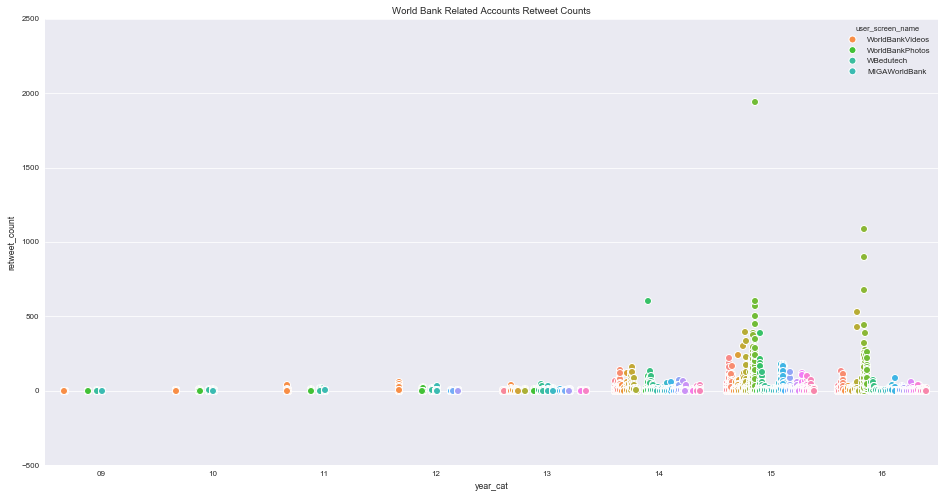

In [49]:
sns.set(style="darkgrid", color_codes=True)
sns.set_context("paper")
plt.figure(figsize=(16, 8))
sns.stripplot(x="year_cat",y="retweet_count",data=wb, hue="user_screen_name", jitter=True)
sns.plt.title("World Bank Related Accounts Retweet Counts")
plt.show()

In [50]:
#Examine just the Poverty GP
#wb=wb[wb.user_screen_name=="WBG_Poverty"]
wb=wb[wb.user_screen_name=="WorldBank"]

In [81]:
wb['hour_cat'] = wb.hour.astype('category', categories=["00", "01", "02", "03", "04", "05", "06" , "07", "08", "09", "10", "11" ,"12", "13", "14" , "15", "16", "17", "18", "19", "20", "21", "22", "23"], ordered=True)

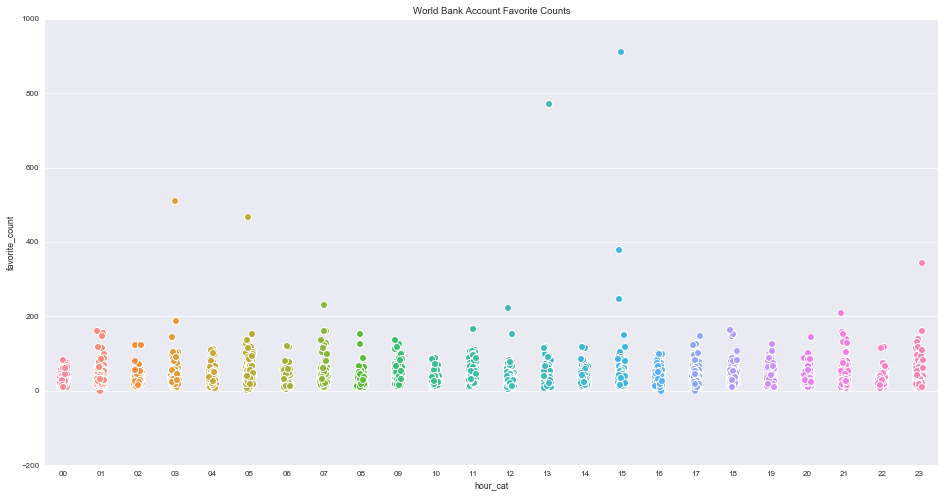

In [84]:
sns.set(style="darkgrid", color_codes=True)
sns.set_context("paper")
plt.figure(figsize=(16, 8))
sns.stripplot(x="hour_cat",y="favorite_count",data=wb,  jitter=True)
sns.plt.title("World Bank Account Favorite Counts")
plt.show()

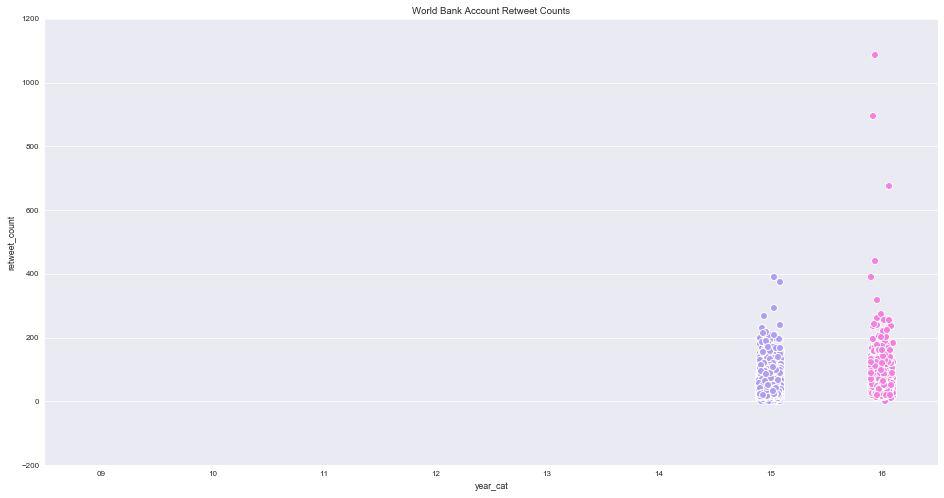

In [52]:
sns.set(style="darkgrid", color_codes=True)
sns.set_context("paper")
plt.figure(figsize=(16, 8))
sns.stripplot(x="year_cat",y="retweet_count",data=wb,  jitter=True)
sns.plt.title("World Bank Account Retweet Counts")
plt.show()

In [53]:
#always reset index
wb = wb.reset_index()

In [54]:
wb.columns

Index([           u'index',               u'id', u'user_screen_name',       u'created_at',   u'favorite_count',
          u'retweet_count',             u'text',           u'length',            u'is_RT',           u'has_ht',
               u'has_link',           u'has_at',             u'tags',            u'users',       u'text_clean',
            u'has_retweet',     u'has_favorite',             u'year',         u'year_cat',       u'year_month',
                   u'hour',     u'fav_RT_ratio'],
      dtype='object')

In [55]:
wb.user_screen_name.value_counts()

WorldBank    2830
Name: user_screen_name, dtype: int64

**----------------------------------------------------------------------------------------------------------**
### Examine the data set

Look for trends
Examine favorite and retweet count trends

In [56]:
wb.describe()

,index,id,favorite_count,retweet_count,length,is_RT,has_ht,has_link,has_at,has_retweet,has_favorite,fav_RT_ratio
count,2830.000000,2.830000e+03,2830.000000,2830.000000,2830.000000,2830,2830,2830,2830,2830.000000,2830.000000,2828.000000
mean,31752.174205,6.637333e+17,41.320495,58.586926,131.725088,0,0.866431,0.983392,0.286572,0.998233,0.998587,inf
std,1022.936782,1.833624e+16,35.768710,48.550601,10.905587,0,0.340249,0.127819,0.45224,0.042003,0.037576,NaN
min,29963.000000,6.337479e+17,0.000000,0.000000,33.000000,False,False,False,False,0.000000,0.000000,0.000000
25%,30857.500000,6.488499e+17,24.000000,32.000000,127.000000,0,1,1,0,1.000000,1.000000,0.583333
50%,31773.500000,6.596497e+17,34.000000,47.000000,135.000000,0,1,1,0,1.000000,1.000000,0.721121
75%,32629.750000,6.797544e+17,49.000000,70.000000,139.000000,0,1,1,1,1.000000,1.000000,0.904987
max,33513.000000,6.990669e+17,910.000000,1087.000000,148.000000,False,True,True,True,1.000000,1.000000,inf


**Retweet observations**

1.Tweets regarding world events to be about world events, and all are retweets from other users. So analyze just own tweets. 

2.Among own tweets, WDR has high retweet

2.endpoverty hashtags have high retwets


In [57]:
#How many tweets have 0 retweets
wb[(wb.retweet_count==0)].user_screen_name.value_counts()

WorldBank    4
Name: user_screen_name, dtype: int64

In [58]:
wb.sort_values("retweet_count", ascending=False).head()

,index,id,user_screen_name,created_at,favorite_count,retweet_count,text,length,is_RT,has_ht,has_link,has_at,tags,users,text_clean,has_retweet,has_favorite,year,year_cat,year_month,hour,fav_RT_ratio
591,30716,682940695980699648,WorldBank,2016-01-01 15:05:25,378,1087,Where the extreme poor live\nIndia 33% \nChin...,140,False,False,True,False,,,Where the extreme poor live India China ...,1,1,16,16,16-01,15,0.347746
269,30311,691276856251846656,WorldBank,2016-01-24 15:10:20,910,896,Where are the cheapest and most expensive coun...,131,False,True,True,False,WDR2016,,Where are the cheapest and most expensive coun...,1,1,16,16,16-01,15,1.015625
374,30442,688346273276121088,WorldBank,2016-01-16 13:05:15,770,677,#SriLanka is the cheapest place for mobile. Se...,124,False,True,True,False,SriLanka WDR2016,,SriLanka is the cheapest place for mobile Se...,1,1,16,16,16-01,13,1.137371
372,30440,688376535389212672,WorldBank,2016-01-16 15:05:30,246,439,Only 15% of the world's population has high-sp...,132,False,True,True,False,digitaldividends,,Only of the worldpopulation has high speed in...,1,1,16,16,16-01,15,0.560364
650,30789,681445769166110722,WorldBank,2015-12-28 12:05:06,223,390,A 10% increase in the use of the internet in a...,140,False,False,True,False,,,A increase in the use of the internet incount...,1,1,15,15,15-12,12,0.571795


In [59]:
wb[(wb.retweet_count==0)]

,index,id,user_screen_name,created_at,favorite_count,retweet_count,text,length,is_RT,has_ht,has_link,has_at,tags,users,text_clean,has_retweet,has_favorite,year,year_cat,year_month,hour,fav_RT_ratio
162,30177,693963777771859968,WorldBank,2016-02-01 01:07:12,0,0,@halabugaighis https://t.co/ZIIQ2WkxEq Not sur...,105,False,False,True,True,,halabugaighis,halabugaighis Not sure the status of an arc...,0,0,16,16,16-02,01,NaN
720,30877,679358384836100096,WorldBank,2015-12-22 17:50:35,1,0,@HuffPostGreen: John Roome on @WorldBank’s tak...,126,False,True,True,True,ParisAgreement COP21,HuffPostGreen WorldBank,HuffPostGreen John Roome on WorldBanktake o...,0,0,15,15,15-12,17,inf
1568,31960,656863394851631104,WorldBank,2015-10-21 16:03:31,2,0,@rkyte365 on why we need a strong climate deal...,127,False,True,True,True,COP21 PriceOnCarbon,rkyte365,rkyteon why we needstrong climate deal for C...,0,1,15,15,15-10,16,inf
2246,32785,647084433246437377,WorldBank,2015-09-24 16:25:25,0,0,"@bharat_sas Saswat, you can shoot a short vide...",130,False,True,False,True,youthbiz,bharat_sas,bharat sas Saswat you can shootshort video e...,0,0,15,15,15-09,16,NaN


In [60]:
#How many tweets have zero favorites
#almost all WB tweets are favorited at least once
wb[(wb.favorite_count==0)]

,index,id,user_screen_name,created_at,favorite_count,retweet_count,text,length,is_RT,has_ht,has_link,has_at,tags,users,text_clean,has_retweet,has_favorite,year,year_cat,year_month,hour,fav_RT_ratio
162,30177,693963777771859968,WorldBank,2016-02-01 01:07:12,0,0,@halabugaighis https://t.co/ZIIQ2WkxEq Not sur...,105,False,False,True,True,,halabugaighis,halabugaighis Not sure the status of an arc...,0,0,16,16,16-02,01,NaN
1963,32445,651087096392892416,WorldBank,2015-10-05 17:30:35,0,2,@JimKim_WBG &amp; @Lagarde discuss #developmen...,137,False,True,True,True,development civilsocietyorgs AMCSO2015,JimKim_WBG Lagarde,JimKim WBG Lagarde discuss development c...,1,0,15,15,15-10,17,0
2246,32785,647084433246437377,WorldBank,2015-09-24 16:25:25,0,0,"@bharat_sas Saswat, you can shoot a short vide...",130,False,True,False,True,youthbiz,bharat_sas,bharat sas Saswat you can shootshort video e...,0,0,15,15,15-09,16,NaN


In [61]:
wb[wb.fav_RT_ratio>1]

,index,id,user_screen_name,created_at,favorite_count,retweet_count,text,length,is_RT,has_ht,has_link,has_at,tags,users,text_clean,has_retweet,has_favorite,year,year_cat,year_month,hour,fav_RT_ratio
5,29968,698916023727190016,WorldBank,2016-02-14 17:05:39,36,30,Do you have privacy laws in your country? How ...,142,False,True,True,False,digitaldividends,,Do you have privacy laws in your country How ...,1,1,16,16,16-02,17,1.200000
7,29971,698824320005570561,WorldBank,2016-02-14 11:01:16,49,48,We're accepting papers for our #ABCDE Conferen...,138,False,True,True,False,ABCDE Data Development,,We re accepting papers for our ABCDE Conferen...,1,1,16,16,16-02,11,1.020833
12,29977,698583801623089152,WorldBank,2016-02-13 19:05:32,41,40,Women make up 2% of #mobilemoney users in Sout...,101,False,True,True,False,mobilemoney,,Women make up of mobilemoney users in South ...,1,1,16,16,16-02,19,1.025000
13,29978,698553568563961856,WorldBank,2016-02-13 17:05:23,33,28,Come help #EndPoverty! Join us as a Web Conten...,132,False,True,True,False,EndPoverty,,Come help EndPoverty Join us asWeb Content P...,1,1,16,16,16-02,17,1.178571
27,29995,698100592749715456,WorldBank,2016-02-12 11:05:26,47,42,With EDGE gender certification we're setting t...,140,False,True,True,False,diversity,,With EDGE gender certification we re setting t...,1,1,16,16,16-02,11,1.119048
44,30016,697587155749752832,WorldBank,2016-02-11 01:05:13,66,64,This small #Indian village proves ending extre...,133,False,True,True,False,Indian poverty,,This small Indian village proves ending extre...,1,1,16,16,16-02,01,1.031250
47,30019,697497960637190144,WorldBank,2016-02-10 19:10:47,34,25,#Pakistan’s #financialinclusion goal: increase...,138,False,True,True,False,Pakistan financialinclusion SMEs finaccess2020,,Pakistan financialinclusion goal increase ba...,1,1,16,16,16-02,19,1.360000
52,30029,697254950557061120,WorldBank,2016-02-10 03:05:09,33,31,"#Pakistan: Despite surge, &lt;5% of #women are...",143,False,True,True,False,Pakistan women financialsector finaccess2020,,Pakistan Despite surge lt of women are i...,1,1,16,16,16-02,03,1.064516
59,30038,697035146701205505,WorldBank,2016-02-09 12:31:43,67,57,Digital technology is transforming lives globa...,136,False,True,True,False,digitaldividends,,Digital technology is transforming lives globa...,1,1,16,16,16-02,12,1.175439
60,30040,696996551424614400,WorldBank,2016-02-09 09:58:22,41,33,#Pakistan can attract more private sector inve...,140,False,True,True,True,Pakistan,JimKim_WBG,Pakistan can attract more private sector inve...,1,1,16,16,16-02,09,1.242424


*** Graphs ***

In [62]:
#wb.groupby('user_screen_name').favorite_count.mean()

In [63]:
#wb.groupby('user_screen_name').retweet_count.median()

In [64]:
wb.head()

,index,id,user_screen_name,created_at,favorite_count,retweet_count,text,length,is_RT,has_ht,has_link,has_at,tags,users,text_clean,has_retweet,has_favorite,year,year_cat,year_month,hour,fav_RT_ratio
0,29963,699066909552201728,WorldBank,2016-02-15 03:05:13,34,60,75% of world’s coral #reefs are threatened. Th...,139,False,True,True,False,reefs,,of worldcoral reefs are threatened Their su...,1,1,16,16,16-02,03,0.566667
1,29964,699036717169451009,WorldBank,2016-02-15 01:05:15,60,70,When girls stay an extra yr in secondary schoo...,136,False,False,True,False,,,When girls stay an extra yr in secondary schoo...,1,1,16,16,16-02,01,0.857143
2,29965,699006510848995333,WorldBank,2016-02-14 23:05:13,50,68,"Among the poor, 78% live in rural areas, &amp;...",140,False,True,True,False,Endpoverty,,Among the poor live in rural areas 500M ...,1,1,16,16,16-02,23,0.735294
3,29966,698976317883154432,WorldBank,2016-02-14 21:05:15,28,45,#Pakistan leads south #Asia in #mobilemoney. T...,105,False,True,True,False,Pakistan Asia mobilemoney,,Pakistan leads south Asia in mobilemoney T...,1,1,16,16,16-02,21,0.622222
4,29967,698946155825250304,WorldBank,2016-02-14 19:05:23,43,96,Constraints such as lack of bank accounts make...,138,False,True,True,False,poverty,,Constraints such as lack of bank accounts make...,1,1,16,16,16-02,19,0.447917


In [65]:
wb.retweet_count.describe()

count    2830.000000
mean       58.586926
std        48.550601
min         0.000000
25%        32.000000
50%        47.000000
75%        70.000000
max      1087.000000
Name: retweet_count, dtype: float64

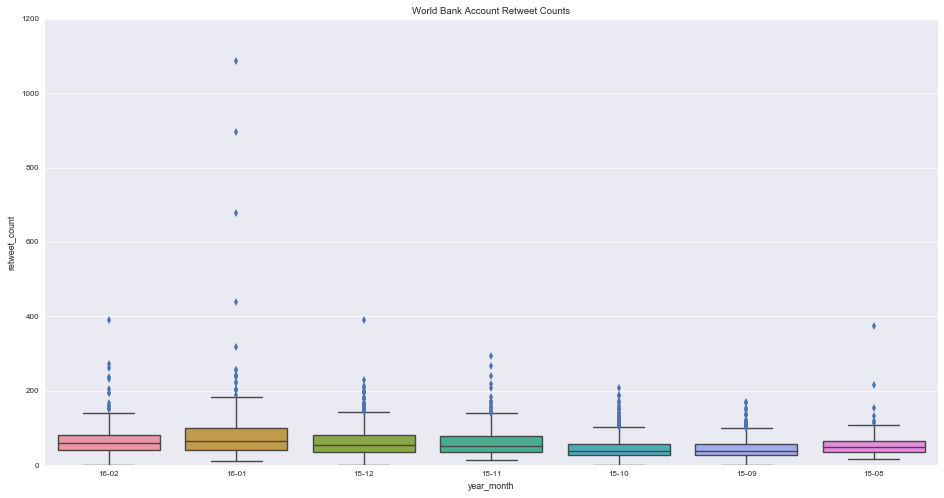

In [66]:
sns.set(style="darkgrid", color_codes=True)
sns.set_context("paper")
plt.figure(figsize=(16, 8))
sns.boxplot(x="year_month",y="retweet_count",data=wb)
sns.plt.title("World Bank Account Retweet Counts")
plt.show()

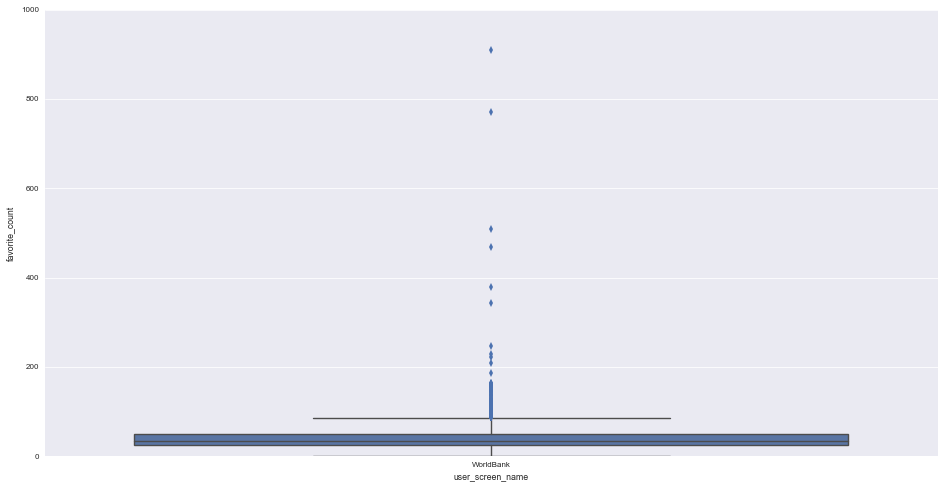

In [67]:
sns.set(style="darkgrid", color_codes=True)
sns.set_context("paper")
plt.figure(figsize=(16, 8))
sns.boxplot(x="user_screen_name",y="favorite_count",data=wb)
plt.show()

**Plot favorite counts by year, and colored by user** 

In [68]:
'''
sns.set(style="darkgrid", color_codes=True)
sns.set_context("paper")
plt.figure(figsize=(12, 8))
test1 = sns.stripplot(x="year_cat",y="favorite_count",data=wb, hue="user_screen_name",jitter=True)
#Q: How to save sns plots
#Q: How to show all the labels in the legend
#test1.savefig('./data/favorite_year.png')
'''

'\nsns.set(style="darkgrid", color_codes=True)\nsns.set_context("paper")\nplt.figure(figsize=(12, 8))\ntest1 = sns.stripplot(x="year_cat",y="favorite_count",data=wb, hue="user_screen_name",jitter=True)\n#Q: How to save sns plots\n#Q: How to show all the labels in the legend\n#test1.savefig(\'./data/favorite_year.png\')\n'

**Plot retweet counts by year, and colored by user** 

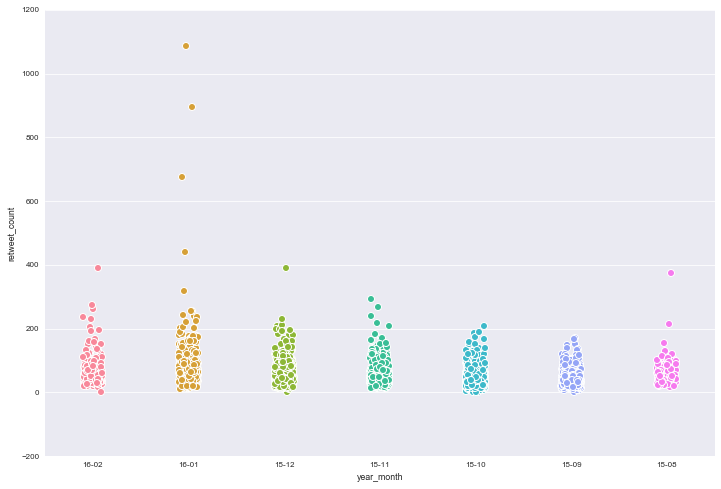

In [69]:
sns.set(style="darkgrid", color_codes=True)
sns.set_context("paper")
plt.figure(figsize=(12, 8))
sns.stripplot(x="year_month",y="retweet_count", data=wb,jitter=True)
#sns.stripplot(x="year_cat",y="retweet_count",hue="user_screen_name", data=wb,jitter=True)
plt.show()

### How does tweeting behavior differ between accounts

**What are the most common users, tags, and words in the top retweet, favorite and zero retweet/favorite**

Popular users:

rkyte365: Special Representative of the UN Secretary General for Sustainable Energy and CEO SE4ALL

diop_wb:

misswakoli: Young,Gifted and Black~Winner of @WorldBankKenya 2015 blog contest~Mentor @AkiliDada~Engineer in Energy Sector~African Woman

In [70]:
#Summarize USERS, WORDS, and TAGS in tweets
def topusers(dat):
    # create a document-term matrix using TF-IDF
    vect = CountVectorizer()
    dtm = vect.fit_transform(dat.users)
    features = vect.get_feature_names()
    counts = np.sum(dtm.toarray(), axis=0)
    # create a DataFrame of tokens with their counts
    print pd.DataFrame({'token':features, 'count':counts}).sort_values('count', ascending=False).head(10)

def topwords(dat):
    # create a document-term matrix using TF-IDF
    vect = CountVectorizer(stop_words='english')
    dtm = vect.fit_transform(dat.text_clean)
    features = vect.get_feature_names()
    counts = np.sum(dtm.toarray(), axis=0)
    # create a DataFrame of tokens with their counts
    print pd.DataFrame({'token':features, 'count':counts}).sort_values('count', ascending=False).head(10)

def toptags(dat):
    # create a document-term matrix using TF-IDF
    vect = CountVectorizer()
    dtm = vect.fit_transform(dat.tags)
    features = vect.get_feature_names()
    counts = np.sum(dtm.toarray(), axis=0)
    # create a DataFrame of tokens with their counts
    print pd.DataFrame({'token':features, 'count':counts}).sort_values('count', ascending=False).head(10)


In [71]:
wb.shape

(2830, 22)

In [72]:
#Examine the top users, words, and tags in the data
topusers(wb)
topwords(wb)
toptags(wb)

     count            token
85     280       jimkim_wbg
191    115        worldbank
36      22  connect4climate
110     19          mzveegh
109     18     musicnegrito
195     18    worldbanklive
43      16      drewholcomb
42      16       djokernole
77      15          ifc_org
89      13     kaushikcbasu
      count          token
4618    344            wbg
2498    280         jimkim
3369    258        poverty
1008    184      countries
4708    164          women
1467    158     endpoverty
3377    152            ppl
832     148  climatechange
2096    147           help
2693    140           live
     count          token
197    158     endpoverty
96     147  climatechange
112    134          cop21
494    123        poverty
11     108         africa
290     67        goodgov
424     66      music4dev
174     59      education
94      51        climate
281     51    globalgoals


In [73]:
wb1=wb[(wb.retweet_count>70)]
wb1.shape

(704, 22)

In [74]:
topusers(wb1)
topwords(wb1)
toptags(wb1)

    count          token
11     61     jimkim_wbg
33     13      worldbank
6       6     djokernole
25      5       un_women
35      5  worldbanklive
23      4         thegef
17      4        mzveegh
29      2     wbg_cities
8       2           icrw
10      2        ifc_org
      count          token
1285    111        poverty
1736     69            wbg
1762     66          women
1291     65            ppl
384      63      countries
950      61         jimkim
561      56     endpoverty
69       51         access
314      48  climatechange
372      47            cop
     count          token
85      56     endpoverty
50      52          cop21
191     49        poverty
40      48  climatechange
4       40         africa
38      19        climate
51      17     corruption
142     17          india
254     16        wdr2016
57      16           data


In [75]:
wb1=wb[(wb.favorite_count>49)]
wb1.shape

(699, 22)

In [76]:
topusers(wb1)
topwords(wb1)
toptags(wb1)

    count          token
13     69     jimkim_wbg
6       7     djokernole
21      6        mzveegh
39      6      worldbank
30      4         thegef
31      4       un_women
42      4  worldbanklive
17      4     malalafund
4       3           cgap
14      2  justintrudeau
      count       token
1294    102     poverty
1758     78         wbg
959      69      jimkim
562      57  endpoverty
388      55   countries
1789     55       women
374      52         cop
68       50      access
1300     46         ppl
801      41        help
     count          token
51      59          cop21
87      57     endpoverty
199     47        poverty
44      41  climatechange
5       34         africa
78      24      education
264     20        wdr2016
12      18    agriculture
146     16     inequality
42      16        climate


In [77]:
wb4=wb[(wb.user_screen_name!="WorldBank") &(wb.user_screen_name!="JimKim_WBG")]
wb5=wb[(wb.user_screen_name!="WorldBank") &(wb.user_screen_name!="JimKim_WBG") & (wb.retweet_count>10)]

In [78]:
topusers(wb4)
topwords(wb4)
toptags(wb4)

ValueError: empty vocabulary; perhaps the documents only contain stop words